In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from test_fonts import *
from NeuralNetwork import  *

## Loading Dataset

In [2]:
fonts = get_all_fonts(1,True)
font_count = len(fonts)
font_count

32

## Creating Autoencoder

In [37]:
beta = 0.5

sigmoid = lambda e: 1 / (1 + np.exp(-e * 2 * beta))
sigmoid_derived = lambda e: 2 * beta * sigmoid(e) * (1 - sigmoid(e))

tanh = lambda e: math.tanh(e)
tanh_derived = lambda  e: 1- math.tanh(e)**2



def activation(e):
    return tanh(e)

def derivative(e):
    return tanh_derived(e)




## Generating training dataset

In [45]:
nn = NNBuilder\
    .with_input(7*5)\
    .with_hidden_layer(30,activation,derivative)\
    .with_hidden_layer(20,activation,derivative)\
    .with_hidden_layer(10,activation,derivative)\
    .with_hidden_layer(2,activation,derivative)\
    .with_hidden_layer(10,activation,derivative)\
    .with_hidden_layer(20,activation,derivative)\
    .with_hidden_layer(30,activation,derivative)\
    .with_output_layer(7*5,activation,derivative)
np.random.shuffle(fonts)
idx = math.floor(font_count * 0.5)
training, test = np.array(fonts[:idx]), np.array(fonts[idx:])

In [ ]:
training_errors, ws = nn.train_on_dataset(training,training)

ITERATION 1
ITERATION 2
ITERATION 3
ITERATION 4
ITERATION 5
ITERATION 6
ITERATION 7
ITERATION 8


In [40]:
print(f"training error: {training_errors}")
# print(f"testing error: {nn.get_error_on_dataset(test, test)}")

training error: 0.5961716770235712


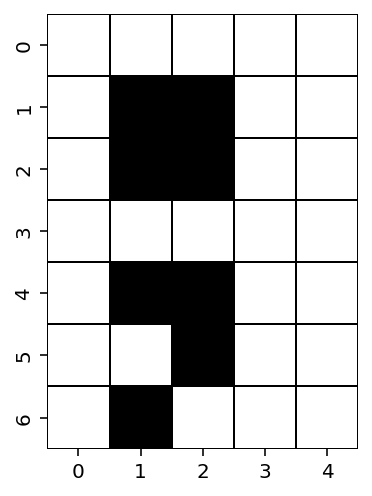

In [43]:
aa = training[2]
value = nn.feed_forward(aa)

print_character(aa.reshape(7,5))

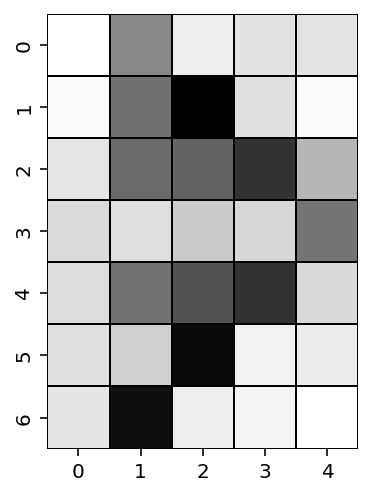

In [44]:
print_character(value.reshape(7,5))